In [56]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

================= Part 1: Find Closest Centroids ====================

To help you implement K-Means, we have divided the learning algorithm 
into two functions -- findClosestCentroids and computeCentroids. In this
part, you should complete the code in the findClosestCentroids function.

In [57]:
print('Finding closest centroids.')
# Load an example dataset that we will be using
data = loadmat('data/ex7data2.mat')
X = data['X']
#Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

Finding closest centroids.


In [58]:
def findClosestCentroids(X, initial_centroids):
    """
    Returns the closest centroids in idx for a dataset X where each row is a single training example.
    """
    m, n = X.shape
    # gather number of centroids
    K = initial_centroids.shape[0]
    idx = np.zeros((m,1))
    temp = np.zeros((K,1))
    
    for i in range(m):
        for j in range(K):
            # calculate displacement
            dist = X[i,:] - initial_centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        # select the smallest length
        idx[i] = np.argmin(temp)+1
    return idx

In [59]:
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


===================== Part 2: Compute Means =========================

After implementing the closest centroids function, you should now
complete the computeCentroids function.

In [60]:
def computeCentroids(X, idx, K):
    """
    Used to move the K centroids to the center of the x^i examples that determine its location
    """
    m, n = X.shape
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    for i in range(m):
        index = int((idx[i]-1)[0])
        # add all data points that map to a centroid
        centroids[index,:]+=X[i,:]
        count[index]+=1
    # then divde by the total number of datapoints making up the centroid to get the average
    return centroids/count

In [61]:
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


=================== Part 3: K-Means Clustering ======================

After you have completed the two functions computeCentroids and
findClosestCentroids, you have all the necessary pieces to run the
kMeans algorithm. In this part, you will run the K-Means algorithm on
the example dataset we have provided. 

In [62]:
def runKMeans(X, initial_centroids, max_iters=10, plot_progress=True):
    K = initial_centroids.shape[0]
    m, n = X.shape
    fig, ax = plt.subplots(nrows=max_iters,ncols=1,figsize=(6,36))
    for i in range(max_iters):
        # Cluster assignment step:
        # Assign each point in X to a centroid
        idx = findClosestCentroids(X, initial_centroids)
        # Move centroid step
        # Compute means based on centroid assignment
        initial_centroids = computeCentroids(X, idx, K)
        
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        # visualize the new centroids
        ax[i].scatter(initial_centroids[:,0],initial_centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
    plt.tight_layout()
    return initial_centroids, idx

location of centroids:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]

 assignment of centroids for first 3 examples X:
[[1.]
 [3.]
 [3.]]


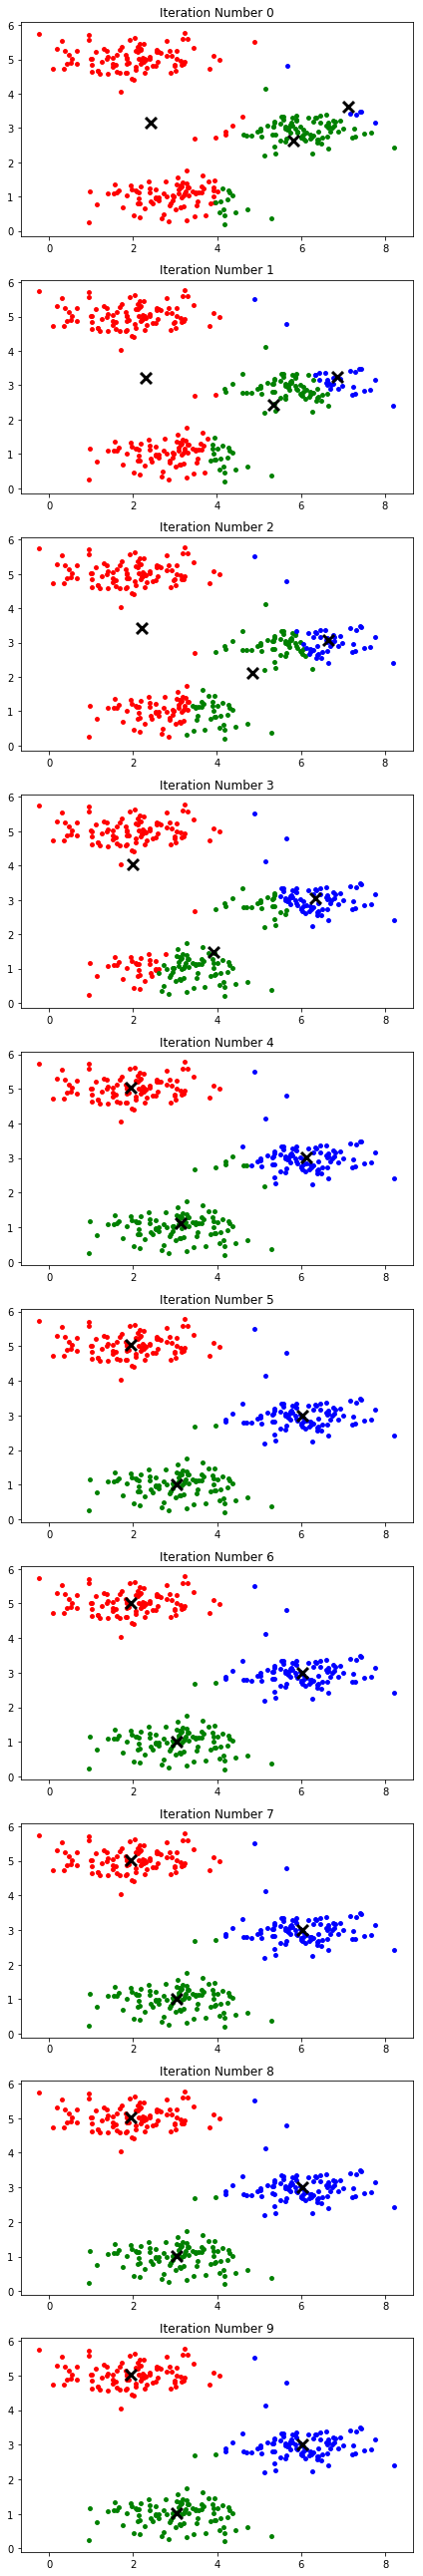

In [63]:
centroids, idx = runKMeans(X, initial_centroids)
print('location of centroids:\n{}'.format(centroids))
print('\n assignment of centroids for first 3 examples X:\n{}'.format(idx[0:3]))

In [64]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to beused in K-Means on the dataset X
    """
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

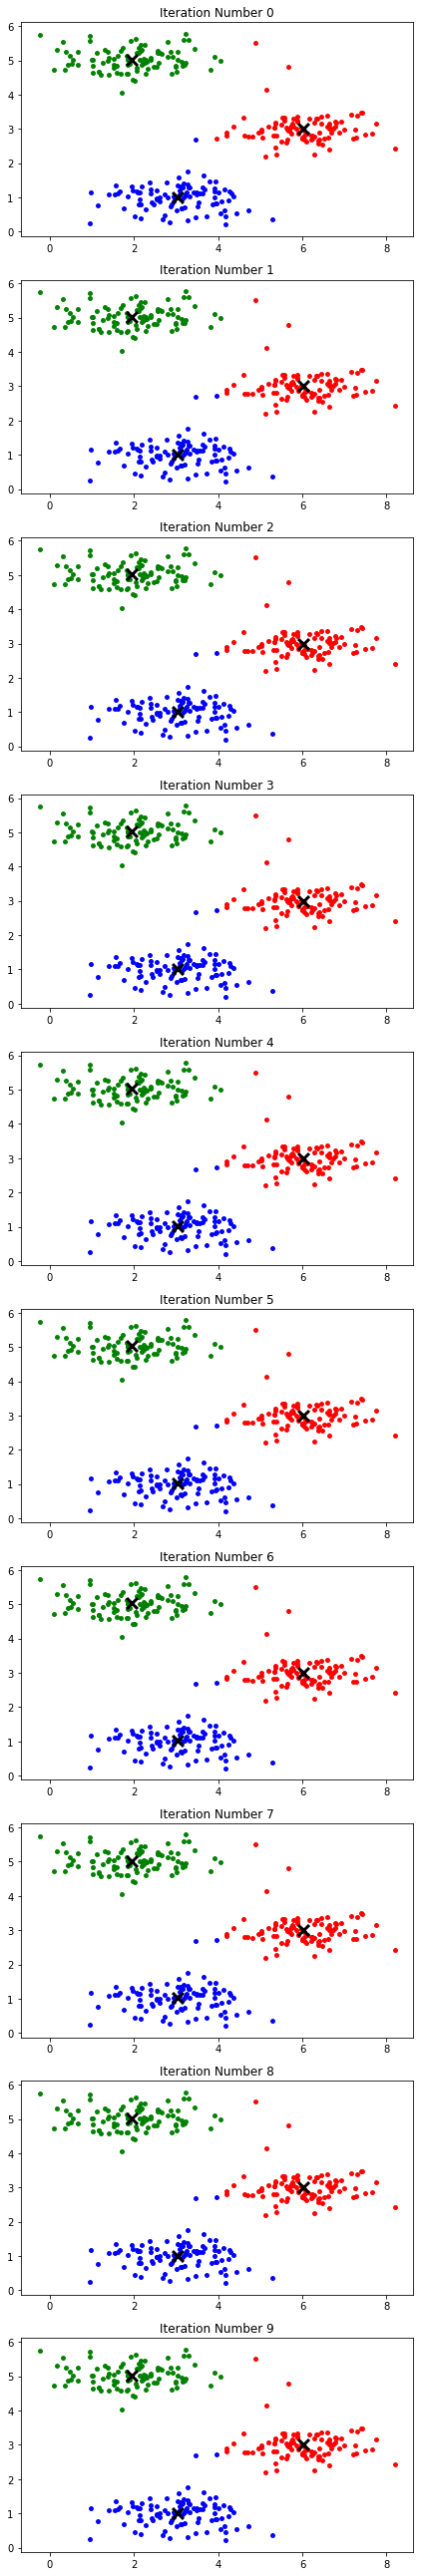

In [65]:
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
centroids, idx = runKMeans(X, centroids)

============= Part 4: K-Means Clustering on Pixels ===============

In this exercise, you will use K-Means to compress an image. To do this, you will first run K-Means on the colors of the pixels in the image and then you will map each pixel onto its closest centroid.

In [66]:
import matplotlib.image as mpimg

X2=mpimg.imread('data/bird_small.png')
X2 = X2.reshape(128*128,3)
print(X2.shape)

(16384, 3)


In [67]:
def kMeans(X, initial_centroids,num_iters,K):
    
    for i in range(num_iters):
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, initial_centroids)
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [68]:
# Running K-means algorithm on the data
K2 = 8
num_iters = 10
initial_centroids2 = kMeansInitCentroids(X2, K2)
centroids2, idx2 = kMeans(X2, initial_centroids2, num_iters,K2)

================= Part 5: Image Compression ======================

In this part of the exercise, you will use the clusters of K-Means to
compress an image. To do this, we first find the closest clusters for
each example. After that, we plot that color for each sample reducing the photo to 8 colors

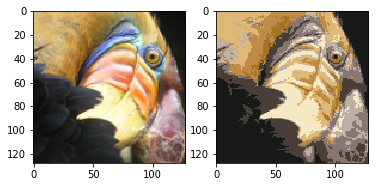

In [69]:
m2,n2 = X2.shape
X2_recovered = X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

# Reshape the recovered image into proper dimensions
X2_recovered = X2_recovered.reshape(128,128,3)

# Display the image
fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)

=============== Part 2: Principal Component Analysis ===============

In [70]:
# Load an example dataset that we will be using
data2 = loadmat('data/ex7data1.mat')
X3 = data2['X']
print(X3.shape)

(50, 2)


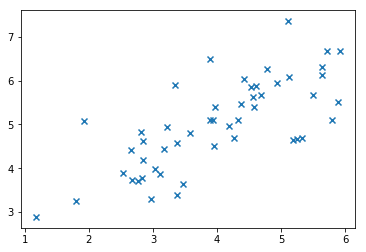

In [93]:
plt.scatter(X3[:,0], X3[:,1], marker='x')

In [86]:
def featureNormalize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    
    X_norm = (X - X_mean) / X_std
    return X_norm, X_mean, X_std

In [87]:
def compute_covariance(X):
    m, n = X.shape
    X_covariance = (1 / m) * X.T @ X
    return X_covariance

In [88]:
from numpy.linalg import svd
def singular_value_decomposition(sigma):
    U, S, VH = svd(sigma)
    return U, S, VH

In [89]:
def pca(X):
    #Principal Component Analysis
    sigma = compute_covariance(X)
    U, S, VH = singular_value_decomposition(sigma)
    return U, S, VH

In [90]:
X_norm,mu,std = featureNormalize(X3)
# U contains principle components
# S contains diagnol matrix
U,S,V = pca(X_norm)

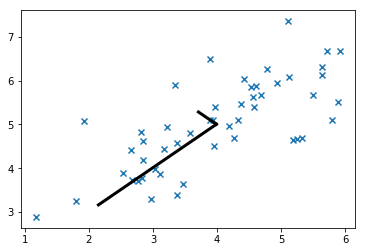

In [95]:
plt.scatter(X3[:,0], X3[:,1], marker='x')
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)

=================== Part 3: Dimension Reduction ===================

You should now implement the projection step to map the data onto the 
first k eigenvectors. The code will then plot the data in this reduced 
dimensional space.  This will show you what the data looks like when 
using only the corresponding eigenvectors to reconstruct it.

(-4, 3)

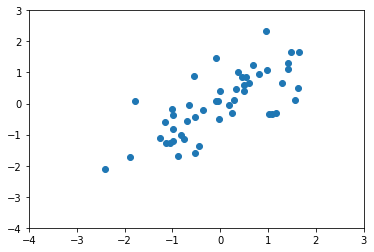

In [99]:
plt.scatter(X_norm[:,0], X_norm[:,1], marker='o')
plt.xlim(-4,3)
plt.ylim(-4,3)

In [107]:
def projectData(X, U, K):
    # project x data set into z where dimension of z is determined by k
    m, n = X.shape
    U_reduce = U[:,0:K]
    Z = np.zeros((m,K))
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduce[:,j]
    return Z

In [108]:
# Project data into K=1 dimension(s)
K = 1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578515


In [109]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    X_rec = np.zeros((Z.shape[0],U.shape[0]))
    U_reduced = U[:,:K]
    
    for i in range(Z.shape[0]):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec


Approximation of the first example: [-1.05805279 -1.05805279]


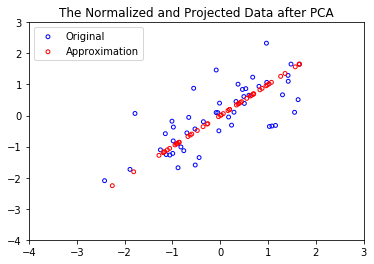

In [112]:
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.xlim(-4,3)
plt.ylim(-4,3)
plt.legend()

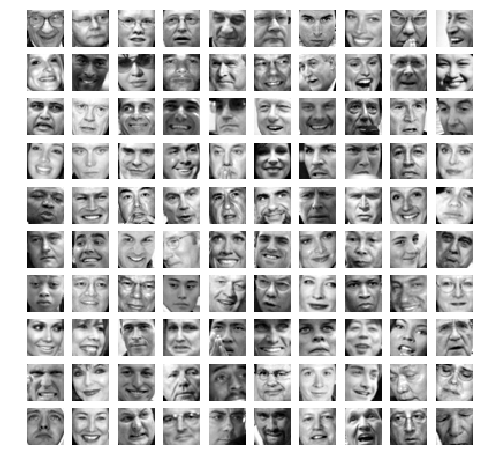

In [113]:
data4 = loadmat('data/ex7faces.mat')
X4 = data4['X']
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

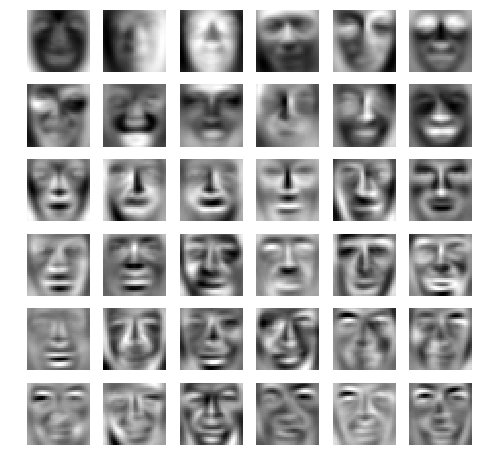

In [114]:
X_norm2 = featureNormalize(X4)[0]

# Run PCA
U2 =pca(X_norm2)[0]

#Visualize the top 36 eigenvectors found
U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

============= Part 6: Dimension Reduction for Faces =================

Project images to the eigen space using the top k eigenvectors 

In [115]:
# project X consisting of 1024 dimensions onto z consisting of 100 dimensions
K2 = 100
Z2 = projectData(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


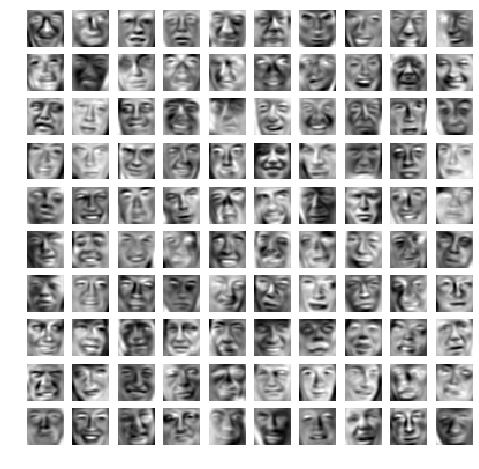

In [116]:
# Data reconstruction
X_rec2  = recoverData(Z2, U2, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")